### Approximate SVB's period from theory and model output

1. Back of the envelope calculation of the theoretical period of the seiche in SVB according to the Handbook of Coastal and Ocean Engineering, Chapter 11 Seiches and Harbor Oscillations by Alexander B. Rabinovich.

Semi-circle or ellipsoid with exponentially decaying bottom or paraboloidal bottom profile:

$$T_0=2.22\left[\frac{2L}{(gh)^{1/2}}\right],$$

where $L$ is the length from mouth to wall, and $h$ is the depth at the mouth.

2. From model output, we look at stations along the bay's coast and get a period from ssh timeseies.

3. Attenuation of ssh at those same stations

In [4]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import seaborn as sns

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
# Load output
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
ds = open_mdsdataset(outdir, prefix=['eta'])

In [7]:
# Load grid variables and mask
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
depth = ds['Depth'][:]

#### How do you choose where the mouth is?

**1st option** Approximate bay to red circle. Half circle would be at blue line and length from mouth to wall would be perpendicular line from blue line (touching 100 m isobath) to coast (yellow line)

Contours at 0, 50, 100, 150, 200 m (dark to light).

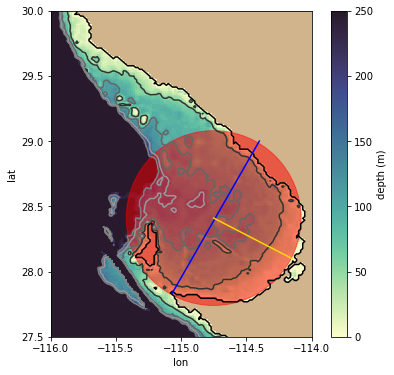

In [8]:
# Plot bay and approximate distances and reference circle
fig, (ax1) = plt.subplots(1,1,figsize=(7,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

Drawing_colored_circle = plt.Circle((-114.75, 28.41), 0.67, alpha=0.5, color='red')
ax1.add_artist( Drawing_colored_circle )

ax1.plot([-115.07,-114.4],[27.83,29],color='blue')
ax1.plot([-114.75,-114.15],[28.41,28.1],color='gold')

plt.show()

In [9]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [10]:
lon1 = -114.75
lat1 = 28.41
lon2 = -114.15
lat2 = 28.1
L = 1000*distance(lat1,lon1, lat2, lon2)
print('L = %1.1f m' %L)

L = 68130.9 m


In [11]:
h = 100
g = 9.81

To = 2.22*((2*L)/((g*h)**(1/2)))
print('With h = %1.1f m, g = %1.1f m/s^2, L=%1.1f m the approximate period is To=%1.2f hr' %(h,g,L,To/3600))

With h = 100.0 m, g = 9.8 m/s^2, L=68130.9 m the approximate period is To=2.68 hr


Which gives an equivalent frequency of 24/2.68 hr = 8.95 cpd. Too high.

But from SSH output we see that length of the seiche is a lot longer than the yellow line above:

<img src="high_phase_SVB.png" alt="high phase" style="width: 300px;"/>
<img src="low_phase_SVB.png" alt="low phase" style="width: 300px;"/>


So the effective length of the bay should be something closer to the next map.

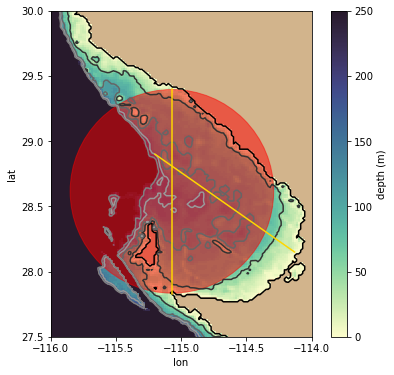

In [12]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

Drawing_colored_circle = plt.Circle((-115.07, 28.615), 0.78, alpha=0.5, color='red')
ax1.add_artist( Drawing_colored_circle )

ax1.plot([-115.07,-115.07],[27.83,29.4],color='gold')
ax1.plot([-115.2,-114.13],[28.9,28.15],color='gold')

plt.show()

In [13]:
lon1 = -115.2
lat1 = 28.9
lon2 = -114.13
lat2 = 28.15
L2 = 1000*distance(lat1,lon1, lat2, lon2)
print('L2 = %1.1f m' %L2)

L2 = 133724.5 m


In [14]:
h2 = 90 # mean depth of transect
g = 9.81

To2 = 2.22*((2*L2)/((g*h2)**(1/2)))
print('With h2 = %1.1f m, g = %1.1f m/s^2, L2=%1.1f m the approximate period is To2=%1.2f hr' %(h2,g,L2,To2/3600))

With h2 = 90.0 m, g = 9.8 m/s^2, L2=133724.5 m the approximate period is To2=5.55 hr


In [15]:
h3 = 150 # max depth of transect
g = 9.81

To3 = 2.22*((2*L2)/((g*h3)**(1/2)))
print('With h3 = %1.1f m, g = %1.1f m/s^2, L2=%1.1f m the approximate period is To3=%1.2f hr' %(h3,g,L2,To3/3600))

With h3 = 150.0 m, g = 9.8 m/s^2, L2=133724.5 m the approximate period is To3=4.30 hr


What depth to choose? (See depth profile along transect below)

If I use the mean depth (90 m) I get a period of 5.5 hr.

If I use the max depth (150 m) I get a period of 4.30 hr.

These give equivalent frequencies of 24/5.5 hr = 4.36 cpd and 24/4.3 hr = 5.58 cpd.

Considering that the seiche is more complicated than just going up and down at the SE corner of the bay (it also moves around from the SW corner to the NE corner) this pretty good, isn't it?

### Depth profile in bay along length

In [16]:
print('%1.2f' %lon[435])
print('%1.2f' %lat[139])

-115.21
28.90


In [17]:
print('%1.2f' %lon[504])
print('%1.2f' %lat[84])

-114.13
28.15


84.01


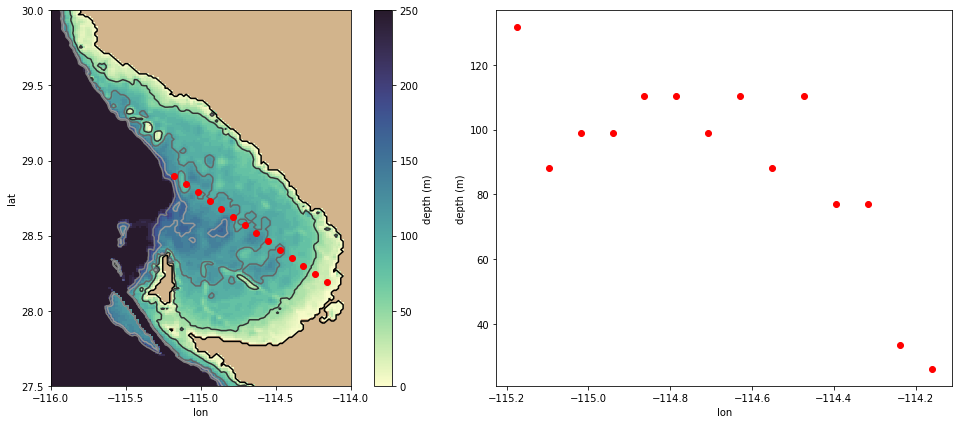

In [18]:
# Slope:
stepy = -4
stepx = 5
x1 = 437
y1 = 139
x2 = 504
y2 = 84

mean_depth = 0

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

for ii in range(14):
    xx = x1+(stepx*ii)
    yy = y1+(stepy*ii)
    ax2.plot(lon[xx],depth[yy,xx],'ro')
    mean_depth = mean_depth+depth[yy,xx]
    ax1.plot(lon[xx], lat[yy], 'ro')
ax2.set_ylabel('depth (m)')
ax2.set_xlabel('lon')

mean_depth = mean_depth/15
print('%1.2f' %mean_depth)
plt.tight_layout()
plt.show()


### Appendix: Seiche evolution during one period

What does the seiche look like?

4.0 m
6.0 m
6.0 m
8.0 m
2.0 m
10.0 m
10.0 m
4.0 m


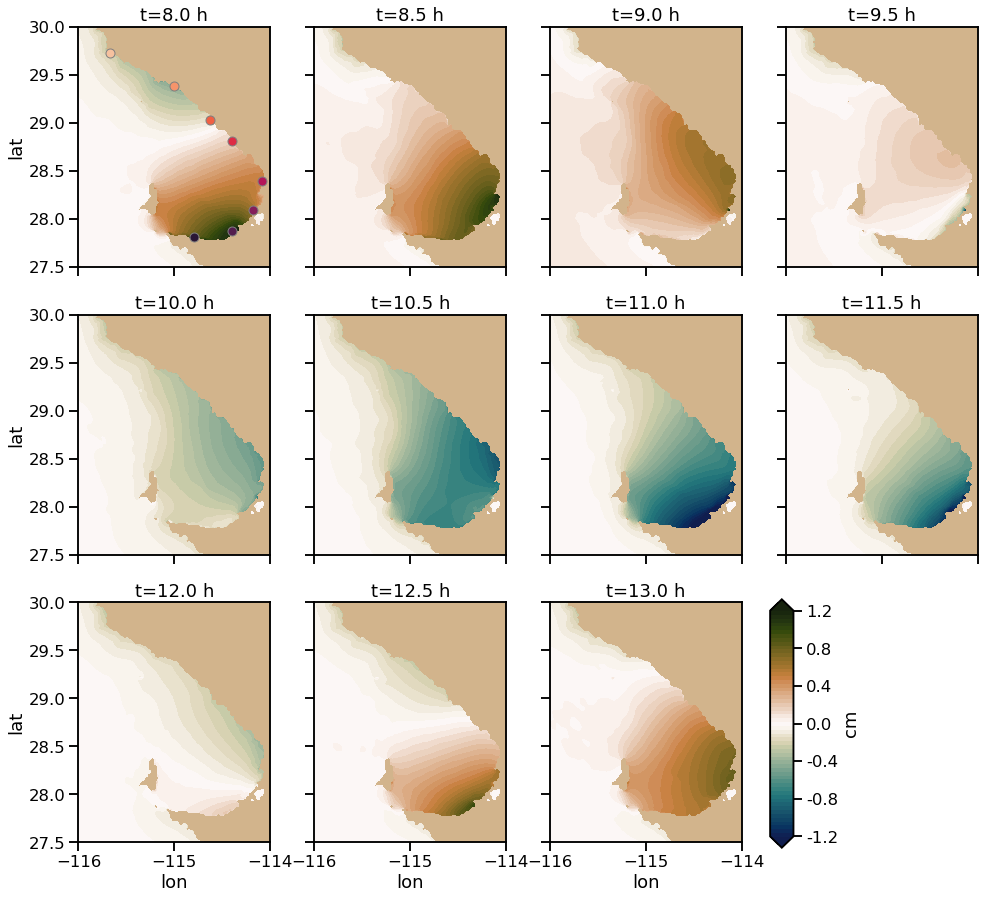

In [19]:
sns.set_context('talk')
sns.set_palette('rocket', 8)
cmap=cmo.cm.tarn_r
time = np.arange(0,720)*600
vmin = -1.2
vmax = 1.2
levs = np.linspace(vmin,vmax,60)
lon_inds = [428+33, 428+59, 428+73,429+78, 428+59, 387+85,428+20,405 ]
lat_inds = [59, 61+3,80,102,133, 149, 175,200]

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12))=plt.subplots(3, 4, 
                                                                            figsize=(16.2,15),
                                                                            sharey=True,
                                                                            sharex=True)
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for tt, ax in zip(range(48, 80, 3),axs):
    ax.set_xlim(-116, -114)
    ax.set_ylim(27.5, 30)
    ax.set_facecolor('tan')

    eta = ds['ETAN'][tt,:,:]
    pc = ax.contourf(lon,lat, 
                     np.ma.masked_array(eta*100,mask=mask[0,:,:]),
                     levels=levs,
                     cmap=cmap, vmin=vmin, vmax=vmax, extend='both')
    ax.set_title('t=%1.1f h'%(time[tt]/3600))
    ax.set_aspect(1)

cbar_ax = fig.add_axes([0.72, 0.12, 0.02, 0.23]) 
cb = fig.colorbar(pc,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.1f', label='cm',
                  extend='both', ticks=[-1.2,-0.8,-0.4,0,0.4,0.8,1.2])

for jj in range(len(lon_inds)):
    ax1.plot(lon[lon_inds[jj]],lat[lat_inds[jj]],'o', markeredgecolor='0.5')
    
# Remove ax12 (this is a lazy way to do it. Use gridspec?)
ax12.xaxis.set_visible(False)
ax12.yaxis.set_visible(False)
for spine in ['top', 'right', 'left', 'bottom']:
    ax12.spines[spine].set_visible(False)

# Check depths of ssh stations
for jj in range(len(lon_inds)):
    print('%1.1f m' %depth[lat_inds[jj], lon_inds[jj]])

for ax in [ax1, ax5, ax9]:
    ax.set_ylabel('lat')
for ax in [ax9, ax10, ax11]:
    ax.set_xlabel('lon')
    

Text(0, 0.5, '')

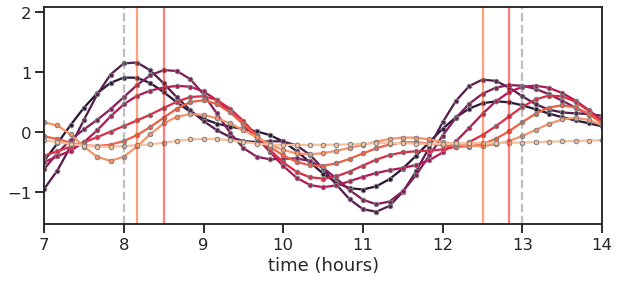

In [20]:
sns.set_style('ticks')
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
for jj in range(len(lon_inds)):
    eta = ds['ETAN'][:288,lat_inds[jj],lon_inds[jj]]
    ax1.plot(time[:288]/3600,
             np.ma.masked_array(eta*100,mask=mask[0,lat_inds[jj],lon_inds[jj]]),
            '.-', markeredgecolor='0.5')
ax1.set_xlim(7,14)
ax1.axvline(8.0, color='0.5', linestyle='--', alpha=0.5)
ax1.axvline(13.0, color='0.5', linestyle='--', alpha=0.5)
ax1.axvline(8.16, color='orangered', linestyle='-', alpha=0.5)
ax1.axvline(12.5, color='orangered', linestyle='-', alpha=0.5)

ax1.axvline(8.5, color='red', linestyle='-', alpha=0.5)
ax1.axvline(12.83, color='red', linestyle='-', alpha=0.5)

ax1.set_xlabel('time (hours)')
ax1.set_ylabel('')

Dashed lines indicate the time period shown in the ssh contourf plots. Orange lines correspond to the max ssh at the second station (from SW to NE). The time between those two lines is 12.5-8.16 = 4.34 hr.

This gives an equivalent frequency of 24/4.34 hr = 5.5 cpd. There is a +/- of 0.16 hr (output resolution in time) and a +/- 0.2 cpd in freq. resolution.

Using next station (red vertical line):
12.83-8.5 = 4.33 hr ---> 5.54 cpd.



### Attenuation

How should I define the attenuation coefficient?

Divide time series over max amplitude?

Fit an exponential?

At least get how long does it take for amplitudes to be 1/2 and 1/4 of max (or min, depending on the station)

0.00 h, A=0.000 cm, B=-0.000 cm, C=-0.000 cm
0.17 h, A=0.001 cm, B=-0.001 cm, C=-0.001 cm
0.33 h, A=0.002 cm, B=-0.001 cm, C=-0.002 cm
0.50 h, A=0.004 cm, B=-0.003 cm, C=-0.003 cm
0.67 h, A=0.009 cm, B=-0.004 cm, C=-0.005 cm
0.83 h, A=0.015 cm, B=-0.007 cm, C=-0.009 cm
1.00 h, A=0.025 cm, B=-0.012 cm, C=-0.014 cm
1.17 h, A=0.042 cm, B=-0.016 cm, C=-0.022 cm
1.33 h, A=0.064 cm, B=-0.024 cm, C=-0.033 cm
1.50 h, A=0.097 cm, B=-0.038 cm, C=-0.050 cm
1.67 h, A=0.147 cm, B=-0.050 cm, C=-0.072 cm
1.83 h, A=0.211 cm, B=-0.069 cm, C=-0.101 cm
2.00 h, A=0.297 cm, B=-0.097 cm, C=-0.139 cm
2.17 h, A=0.412 cm, B=-0.122 cm, C=-0.185 cm
2.33 h, A=0.551 cm, B=-0.152 cm, C=-0.239 cm
2.50 h, A=0.716 cm, B=-0.190 cm, C=-0.302 cm
2.67 h, A=0.914 cm, B=-0.220 cm, C=-0.371 cm
2.83 h, A=1.134 cm, B=-0.247 cm, C=-0.443 cm
3.00 h, A=1.367 cm, B=-0.268 cm, C=-0.512 cm
3.17 h, A=1.607 cm, B=-0.275 cm, C=-0.577 cm
3.33 h, A=1.838 cm, B=-0.218 cm, C=-0.584 cm
3.50 h, A=1.927 cm, B=-0.058 cm, C=-0.488 cm
3.67 h, A=

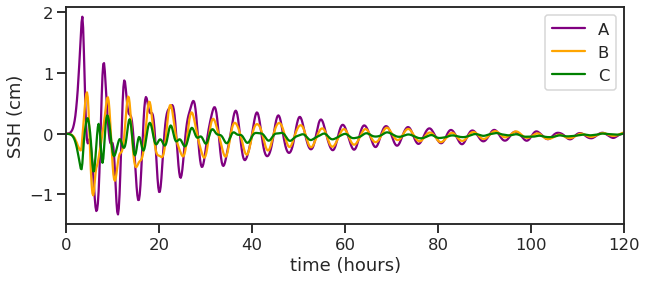

In [21]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
eta = ds['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2 = ds['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3 = ds['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.plot(time[:]/3600,np.ma.masked_array(eta*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'purple', label='A' )
ax1.plot(time[:]/3600,np.ma.masked_array(eta2*100,mask=mask[0,lat_inds[4],lon_inds[4]]),'orange', label='B')
ax1.plot(time[:]/3600,np.ma.masked_array(eta3*100,mask=mask[0,lat_inds[6],lon_inds[6]]),'green', label='C')

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH (cm)')
ax1.legend()

for tt, hA, hB, hC in zip(time[:300]/3600,np.ma.masked_array(eta*100,mask=mask[0,lat_inds[1],lon_inds[1]]),
                          np.ma.masked_array(eta2*100,mask=mask[0,lat_inds[4],lon_inds[4]]),
                          np.ma.masked_array(eta3*100,mask=mask[0,lat_inds[6],lon_inds[6]])): 
    print('%1.2f h, A=%1.3f cm, B=%1.3f cm, C=%1.3f cm' %(tt,hA,hB,hC))

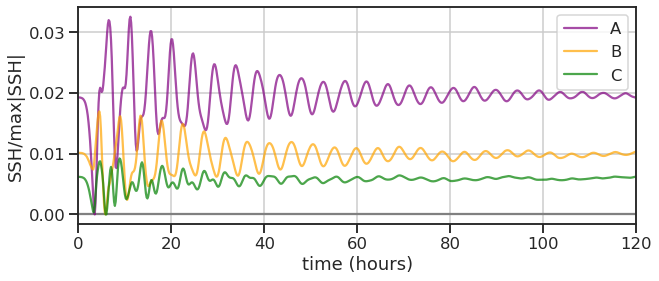

In [22]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
eta = ds['ETAN'][:,lat_inds[1],lon_inds[1]].data
eta2 = ds['ETAN'][:,lat_inds[4],lon_inds[4]].data
eta3 = ds['ETAN'][:,lat_inds[6],lon_inds[6]].data

ax1.axhline(0, color='0.5')
ax1.plot(time[:]/3600,abs(eta-np.nanmax(eta)),
         'purple', label='A', alpha=0.7)
ax1.plot(time[:]/3600,abs(eta2-np.nanmin(eta2)),
         'orange', label='B', alpha=0.7)
ax1.plot(time[:]/3600,abs(eta3-np.nanmin(eta3)),
         'green', label='C', alpha=0.7)

#ax1.axhline(1, color='0')
#ax1.axhline(0.75, color='0.2')
#ax1.axhline(0.5, color='0.4')
#ax1.axhline(0.25, color='0.6')
#ax1.axhline(0.10, color='0.8')

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH/max|SSH|')
ax1.grid(True, which='both')
ax1.legend()

In [23]:
# Load output Barotropic
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/02_SVB_barotropic_output/'
ds2 = open_mdsdataset(outdir2, prefix=['eta'])

50.00 h, A=0.000 cm, B=-0.000 cm, C=-0.000 cm
50.17 h, A=0.001 cm, B=-0.001 cm, C=-0.001 cm
50.33 h, A=0.002 cm, B=-0.001 cm, C=-0.002 cm
50.50 h, A=0.004 cm, B=-0.003 cm, C=-0.003 cm
50.67 h, A=0.009 cm, B=-0.004 cm, C=-0.005 cm
50.83 h, A=0.015 cm, B=-0.007 cm, C=-0.009 cm
51.00 h, A=0.026 cm, B=-0.012 cm, C=-0.015 cm
51.17 h, A=0.042 cm, B=-0.016 cm, C=-0.022 cm
51.33 h, A=0.065 cm, B=-0.025 cm, C=-0.034 cm
51.50 h, A=0.098 cm, B=-0.039 cm, C=-0.051 cm
51.67 h, A=0.149 cm, B=-0.051 cm, C=-0.073 cm
51.83 h, A=0.213 cm, B=-0.070 cm, C=-0.102 cm
52.00 h, A=0.300 cm, B=-0.099 cm, C=-0.140 cm
52.17 h, A=0.417 cm, B=-0.123 cm, C=-0.186 cm
52.33 h, A=0.557 cm, B=-0.154 cm, C=-0.240 cm
52.50 h, A=0.724 cm, B=-0.193 cm, C=-0.303 cm
52.67 h, A=0.924 cm, B=-0.221 cm, C=-0.371 cm
52.83 h, A=1.146 cm, B=-0.247 cm, C=-0.442 cm
53.00 h, A=1.381 cm, B=-0.269 cm, C=-0.509 cm
53.17 h, A=1.622 cm, B=-0.272 cm, C=-0.570 cm
53.33 h, A=1.856 cm, B=-0.208 cm, C=-0.570 cm
53.50 h, A=1.945 cm, B=-0.039 cm, 

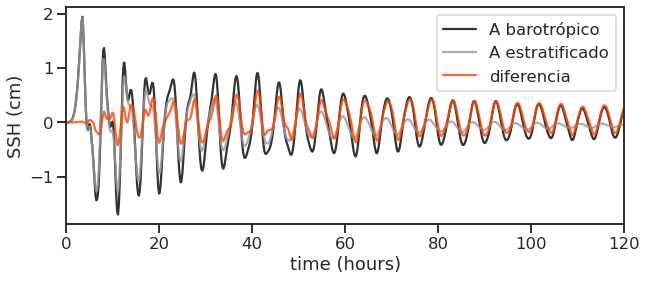

In [31]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
etab = ds2['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2b = ds2['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3b = ds2['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.plot(time[:]/3600,np.ma.masked_array((etab)*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'k', alpha=0.8, label='A barotrópico' )
ax1.plot(time[:]/3600,np.ma.masked_array((eta)*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'0.6', alpha=0.8, label='A estratificado')
ax1.plot(time[:]/3600,(np.ma.masked_array((etab)*100,mask=mask[0,lat_inds[1],lon_inds[1]])-
         np.ma.masked_array((eta)*100,mask=mask[0,lat_inds[1],lon_inds[1]])),
         'orangered', label='diferencia', alpha=0.8)

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH (cm)')
ax1.legend()
for tt, hA, hB, hC in zip(time[300:700]/3600,np.ma.masked_array(etab*100,mask=mask[0,lat_inds[1],lon_inds[1]]),
                          np.ma.masked_array(eta2b*100,mask=mask[0,lat_inds[4],lon_inds[4]]),
                          np.ma.masked_array(eta3b*100,mask=mask[0,lat_inds[6],lon_inds[6]])): 
    print('%1.2f h, A=%1.3f cm, B=%1.3f cm, C=%1.3f cm' %(tt,hA,hB,hC))

In [25]:
# Load output August TS
outdir3 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/04_SVB_augTS_output/'
ds3 = open_mdsdataset(outdir3, prefix=['eta'])

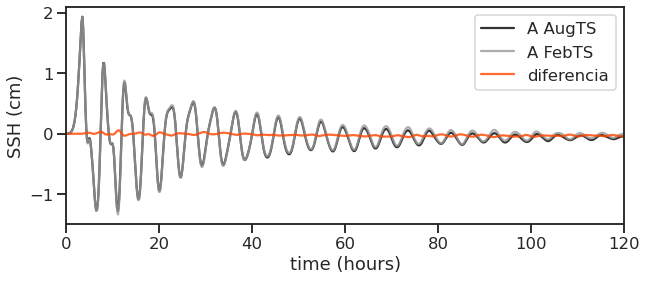

In [26]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
etab = ds3['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2b = ds3['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3b = ds3['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.plot(time[:]/3600,np.ma.masked_array((etab)*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'k', 
         alpha=0.8, label='A AugTS' )
ax1.plot(time[:]/3600,np.ma.masked_array((eta)*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'0.6', 
         alpha=0.8, label='A FebTS')
ax1.plot(time[:]/3600,(np.ma.masked_array((etab)*100,mask=mask[0,lat_inds[1],lon_inds[1]])-
         np.ma.masked_array((eta)*100,mask=mask[0,lat_inds[1],lon_inds[1]])),
         'orangered', label='diferencia', alpha=0.8)

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH (cm)')
ax1.legend()

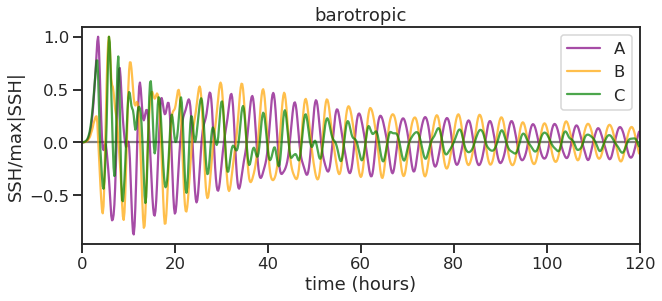

In [27]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
eta = ds2['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2 = ds2['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3 = ds2['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.axhline(0, color='0.5')
ax1.plot(time[:]/3600,np.ma.masked_array(eta*100,mask=mask[0,lat_inds[1],lon_inds[1]])/np.nanmax(eta[:]*100),
         'purple', label='A', alpha=0.7)
ax1.plot(time[:]/3600,np.ma.masked_array(eta2*100,mask=mask[0,lat_inds[4],lon_inds[4]])/np.nanmin(eta2[:]*100),
         'orange', label='B', alpha=0.7)
ax1.plot(time[:]/3600,np.ma.masked_array(eta3*100,mask=mask[0,lat_inds[6],lon_inds[6]])/np.nanmin(eta3[:]*100),
         'green', label='C', alpha=0.7)

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH/max|SSH|')
ax1.set_title('barotropic')
ax1.legend()

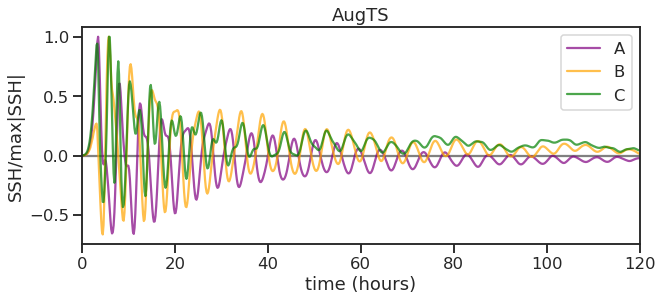

In [28]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
eta = ds3['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2 = ds3['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3 = ds3['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.axhline(0, color='0.5')
ax1.plot(time[:]/3600,np.ma.masked_array(eta*100,mask=mask[0,lat_inds[1],lon_inds[1]])/np.nanmax(eta[:]*100),
         'purple', label='A', alpha=0.7)
ax1.plot(time[:]/3600,np.ma.masked_array(eta2*100,mask=mask[0,lat_inds[4],lon_inds[4]])/np.nanmin(eta2[:]*100),
         'orange', label='B', alpha=0.7)
ax1.plot(time[:]/3600,np.ma.masked_array(eta3*100,mask=mask[0,lat_inds[6],lon_inds[6]])/np.nanmin(eta3[:]*100),
         'green', label='C', alpha=0.7)

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH/max|SSH|')
ax1.set_title('AugTS')
ax1.legend()

In [29]:
1.927/4

0.48175